In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import numpy as np
import cv2
import matplotlib.gridspec as gridspec
import glob
import os

In [3]:
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
	# return the histogram
	return hist

In [4]:
def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

In [5]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(15, 15))
    plt.imshow(image, interpolation='nearest')

# Clusters are 3 to accommodate Black Mask, Green and Red patches

## Ripe, Unripe, and Semi ripe fruits are clustered in 4 color spaces.


In [6]:
def showClusters(path):
    
    colorSpace = [cv2.COLOR_BGR2RGB, cv2.COLOR_BGR2LAB, cv2.COLOR_BGR2YCrCb, cv2.COLOR_BGR2HSV]
    cs_string = ["RGB", "LAB", "YCrCb", "HSV"]
    num = 1
    for cs in colorSpace:
        
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cs)
        #image = cv2.GaussianBlur(image, (7, 7), 0)
        
        sp1 = int(str(num) + "2" + "1")
        sp2 = int(str(num) + "2" + "2")
        #print(sp1, sp2, num)
        
        fig = plt.figure(figsize=(15,15))
        plt.subplot(sp1) # 121 : row, column, image_number
        plt.title(cs_string[num - 1])
        plt.imshow(image, interpolation='nearest')
        
        image = image.reshape((image.shape[0] * image.shape[1], 3))
        
        clt = KMeans(n_clusters = 3)
        clt.fit(image) 
        
        hist = centroid_histogram(clt)
        bar = plot_colors(hist, clt.cluster_centers_)
        
        plt.subplot(sp2) # 122 : row, column, image_number
        plt.title('Dominant Clusters')
        plt.imshow(bar)
        
        num = num + 1
        plt.show()
    

# Ripen Mango

['img_1_9_0_Mangos1_output.png', 'img_1_10_0_Mangos_output.png', 'img_1_9_0_Mangos_output.png', 'img_1_5_0_Mangos(3)_output.png', 'img_1_6_0_Mangos_output.png', 'img_1_7_0_Mangos_output.png', 'img_1_5_0_Mangos_output.png', 'img_1_3_0_Mangos_output.png']


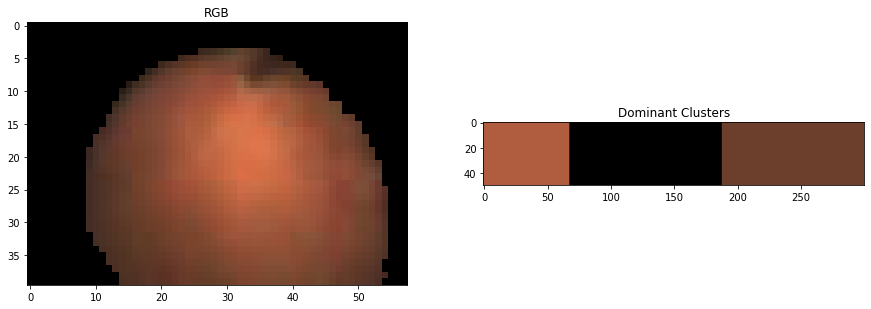

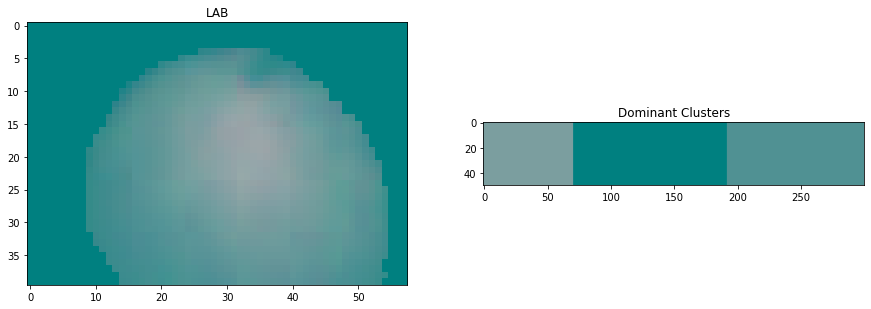

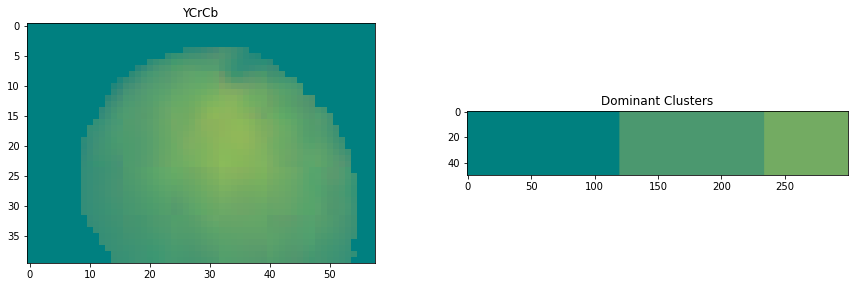

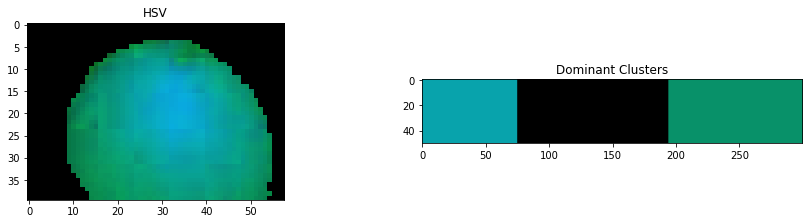

'/Users/pavankumar/Documents/Robotics MSc/Dissertation/Fruit-Detection-in-Orchards/Ripeness Analysis'

In [7]:
os.chdir("msk_ripen")
#path = "msk_ripen/*.png"
newList = glob.glob("*.png")
print(newList)
showClusters(newList[6])
os.chdir("..")
%pwd

# Raw Mango

['img_1_2_0_Mangos1_output.png', 'img_1_8_0_Mangos(7)_output.png', 'img_1_7_0_Mangos(15)_output.png', 'img_1_4_0_Mangos(10)_output.png', 'img_1_7_0_Mangos(14)_output.png', 'img_1_9_0_Mangos(5)_output.png', 'img_1_11_0_Mangos_output.png', 'img_1_8_0_Mangos(11)_output.png', 'img_1_9_0_Mangos_output.png', 'img_1_5_0_Mangos_output.png', 'img_1_2_0_Mangos_output.png']


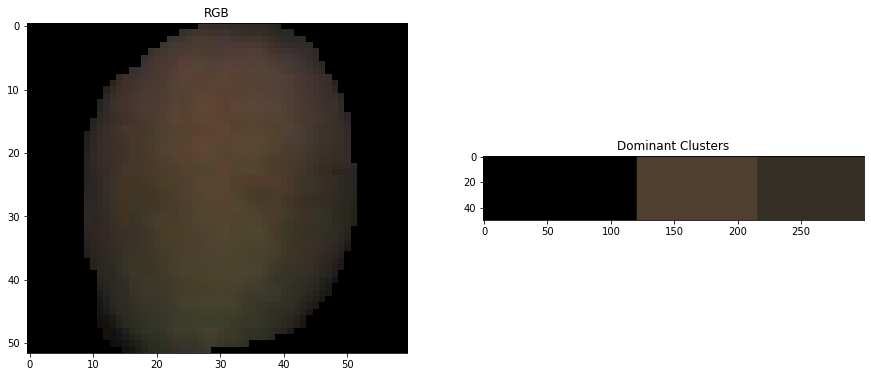

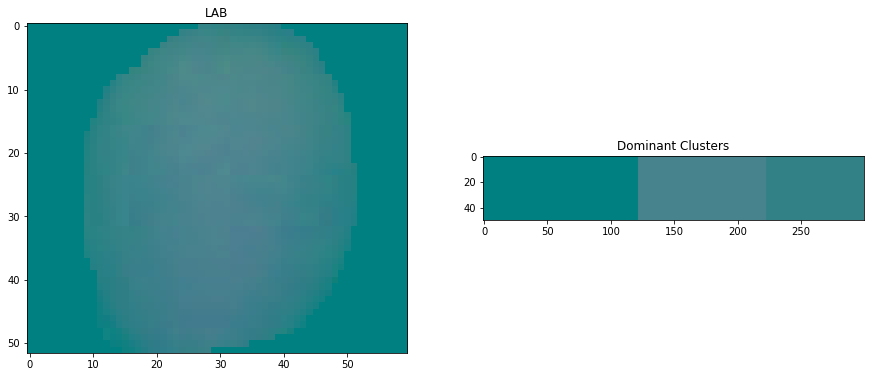

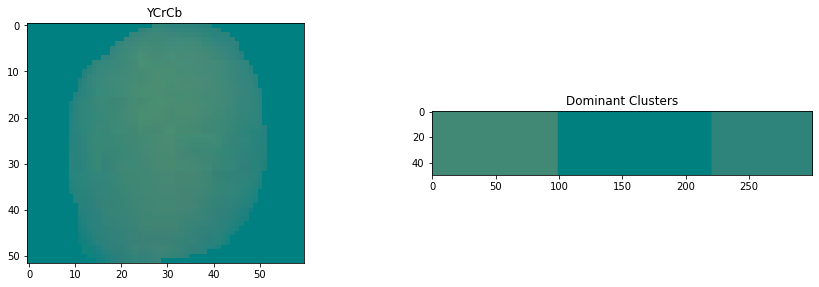

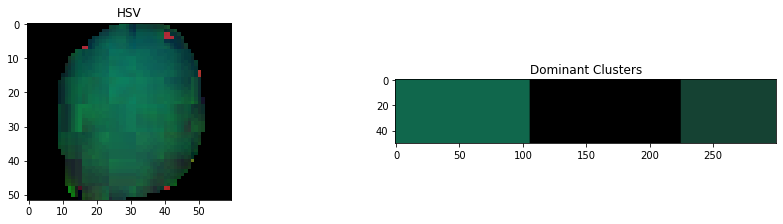

'/Users/pavankumar/Documents/Robotics MSc/Dissertation/Fruit-Detection-in-Orchards/Ripeness Analysis'

In [86]:
os.chdir("msk_unripen")
#path = "msk_ripen/*.png"
newList = glob.glob("*.png")
print(newList)
showClusters(newList[1])
os.chdir("..")
%pwd

# Semi Ripe Mango

['img_1_10_0_Mango.jpg']


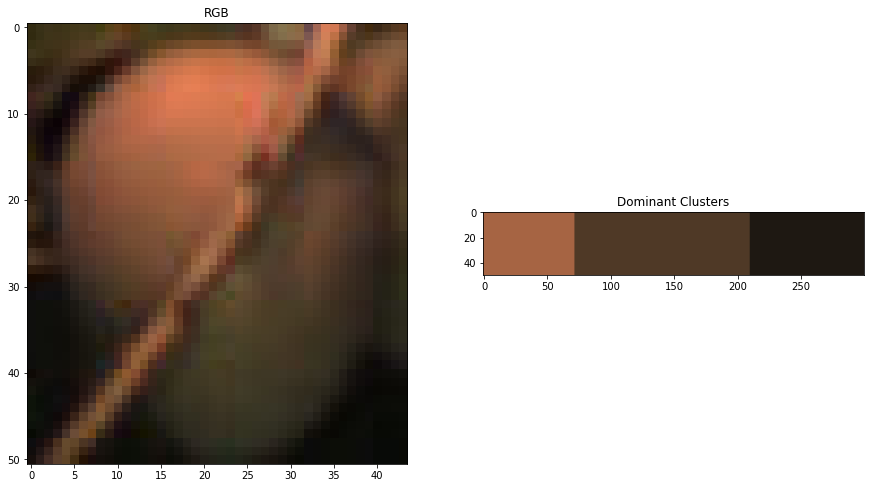

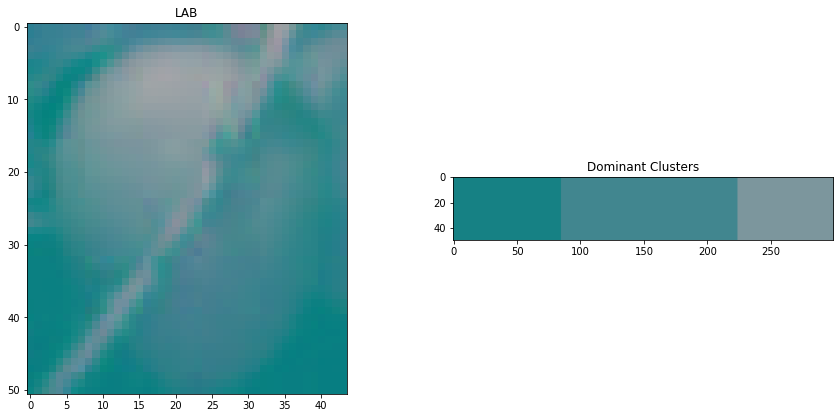

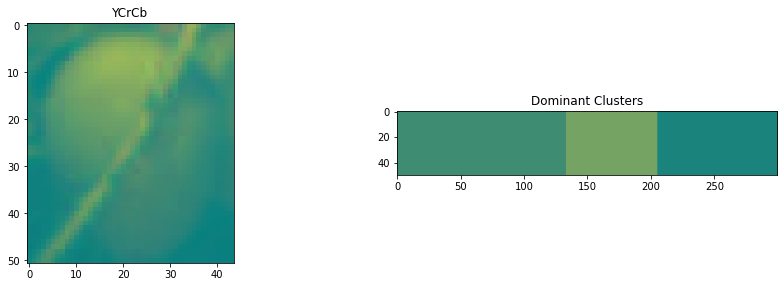

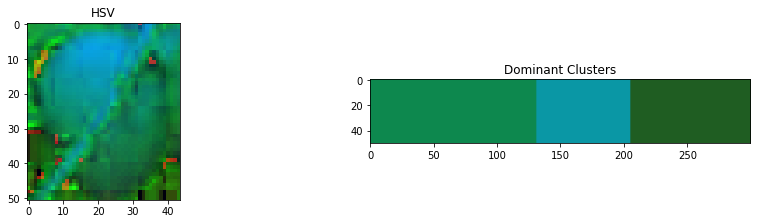

'/Users/pavankumar/Documents/Robotics MSc/Dissertation/Fruit-Detection-in-Orchards/Ripeness Analysis'

In [87]:
os.chdir("msk_semi")
#path = "msk_ripen/*.png"
newList = glob.glob("*.jpg")
print(newList)
showClusters(newList[0])
os.chdir("..")
%pwd

# 3D Scatter Plot 

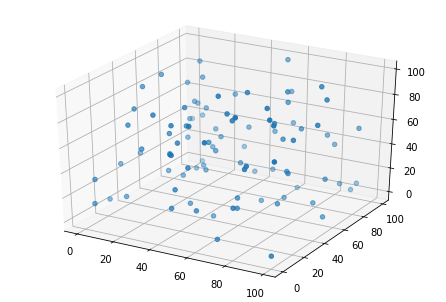

In [1]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = list(range(0, 100))
sequence_containing_y_vals = list(range(0, 100))
sequence_containing_z_vals = list(range(0, 100))

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
pyplot.show()

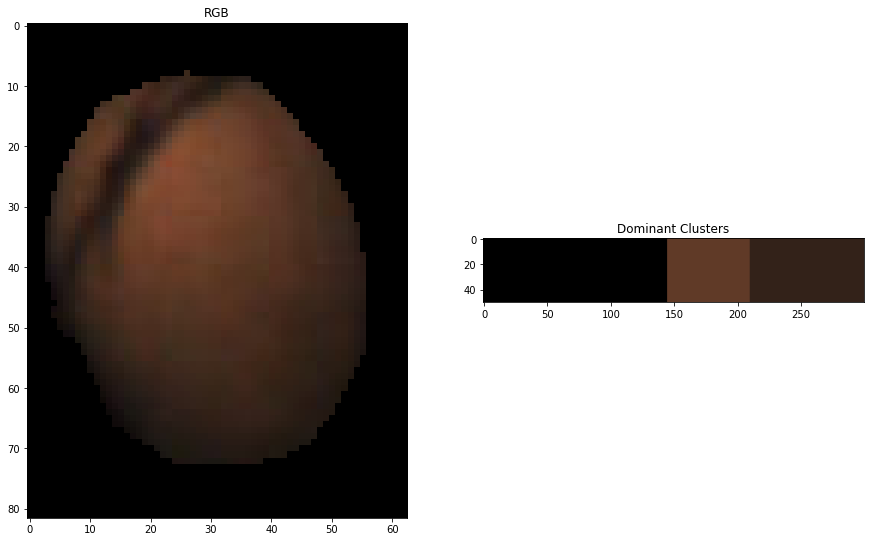

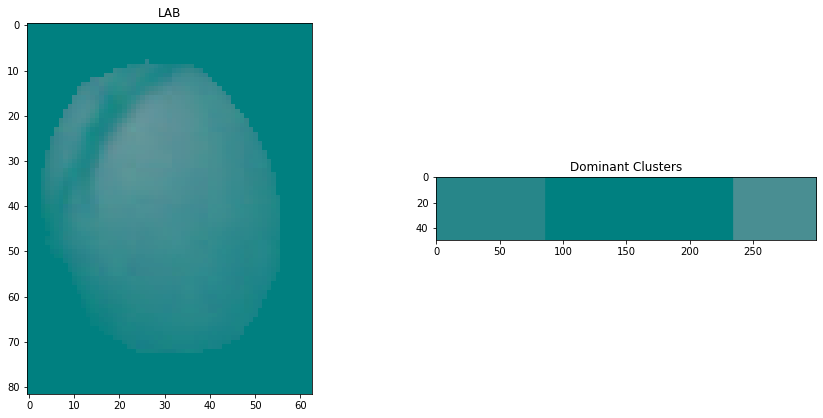

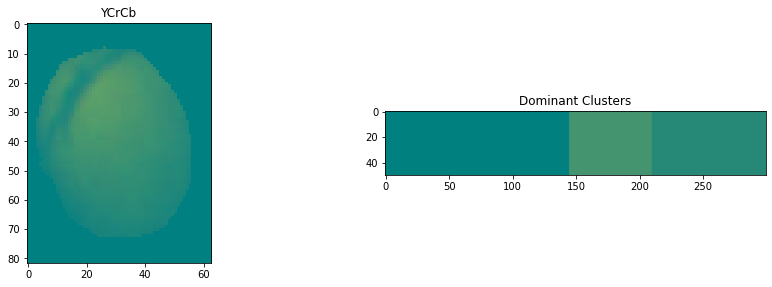

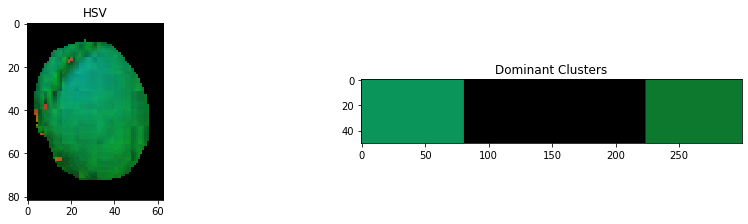

In [24]:
%pwd
os.chdir("msk_ripen")
showClusters("img_1_3_0_Mangos_output.png")
os.chdir("..")

img_1_5_0_Mangos_output.png
(82, 63)


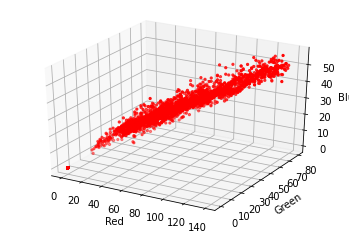

'/Users/pavankumar/Documents/Robotics MSc/Dissertation/Fruit-Detection-in-Orchards/Ripeness Analysis'

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from PIL import Image

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis

print(newList[6])

os.chdir("msk_ripen")
#showClusters("img_1_3_0_Mangos_output.png")

im = Image.open("img_1_3_0_Mangos_output.png")
r, g, b = list(im.getdata(0)), list(im.getdata(1)), list(im.getdata(2))


axis.scatter(r, g, b, c="#ff0000", marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()
 
os.chdir("..")
%pwd


[ 3.65421645e+00  3.32978580e+00  2.95845845e+00 -4.68412423e-01
  1.72867662e+00 -2.66927790e+00 -4.47919200e+00 -4.58115984e+00
  2.40725102e+00 -2.56111183e+00 -2.84120730e+00 -2.73271220e+00
 -5.56488886e+00  2.37466480e+00  8.66186213e-01  1.55962476e+00
 -3.62338441e+00  3.00336686e+00 -2.57385929e+00  1.93999310e+00
  1.83008934e+00  3.46700842e+00 -4.93047149e+00 -4.83771841e+00
  3.06852253e+00  2.74407986e+00 -1.79907607e+00  3.35335557e+00
  4.52154835e+00  3.72295169e+00 -4.88546649e+00  3.25599565e+00
  1.00816004e+00 -1.56849991e+00 -5.51274539e+00 -1.87550405e+00
  4.54472292e+00 -3.00992451e+00  5.64869671e-01  2.57879475e+00
  3.82953040e+00  4.11226580e+00 -3.38485677e+00  2.79681240e+00
  4.88384876e+00 -3.18283835e-01 -2.55737698e+00  3.53402755e+00
  5.94780410e+00  4.09059121e+00  3.35709630e-01 -8.90947252e-01
  4.93438493e-01  1.33886452e+00  2.93630151e+00  2.87367136e+00
  1.77579331e+00 -4.58017362e+00 -4.37052390e+00 -2.99624384e+00
 -8.49022022e-01 -4.13961

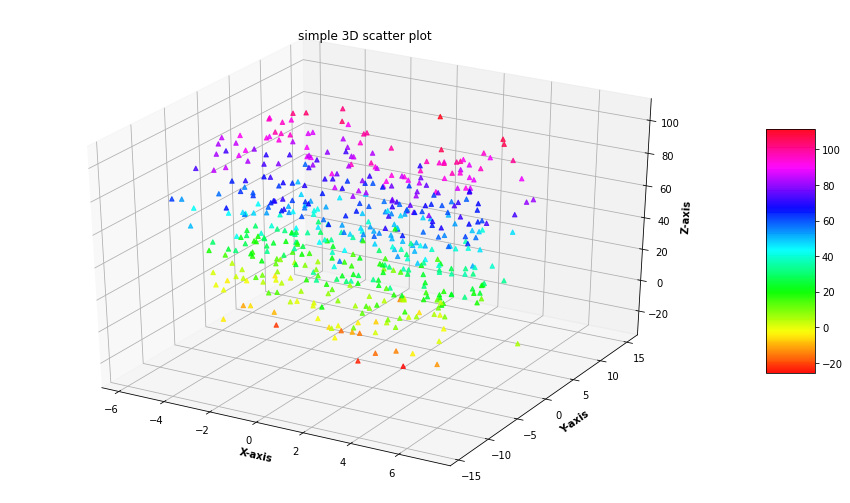

In [35]:

# Creating dataset 
z = 4 * np.tan(np.random.randint(10, size =(500))) + np.random.randint(100, size =(500)) 
x = 4 * np.cos(z) + np.random.normal(size = 500) 
y = 4 * np.sin(z) + 4 * np.random.normal(size = 500) 

print(x)
  
# Creating figure 
fig = plt.figure(figsize = (16, 9)) 
ax = plt.axes(projection ="3d") 
    
# Add x, y gridlines  
ax.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.3,  
        alpha = 0.2)  
  
# Creating color map 
my_cmap = plt.get_cmap('hsv') 
  
# Creating plot 
sctt = ax.scatter3D(x, y, z, 
                    alpha = 0.8, 
                    c = (x + y + z),  
                    cmap = my_cmap,  
                    marker ='^') 
  
plt.title("simple 3D scatter plot") 
ax.set_xlabel('X-axis', fontweight ='bold')  
ax.set_ylabel('Y-axis', fontweight ='bold')  
ax.set_zlabel('Z-axis', fontweight ='bold') 
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 
  
# show plot 
plt.show() 